In [98]:
# importação de bibliotecas
from sklearn import datasets
from sklearn import svm
import numpy as np 
import matplotlib.pyplot as plt

#Carrega o digits dataset na variável digits
digits = datasets.load_digits()

#Mostra que há 1797 imagens (8 por 8 imagens para uma dimensionalidade de 64)
print("Forma de dados da imagem" , digits.data.shape)

#Mostra que há 1797 amostras (inteiros de 0 a 9)
print("Forma de dados do rótulo", digits.target.shape)

Forma de dados da imagem (1797, 64)
Forma de dados do rótulo (1797,)


In [99]:
#Mostra os dados, as features de cada dígito manuscrito
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [100]:
#Mostra os dados, das classificações de cada dígito manuscrito
digits.target

array([0, 1, 2, ..., 8, 9, 8])

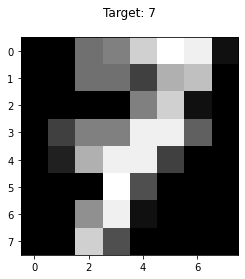

In [106]:
#Plota um valor aleatorio entre 0 e 9
plt.figure(figsize=(20,4))
ran = np.random.randint(max(digits.target))
image, label = digits.data[ran], digits.target[ran]

plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
plt.title('Target: {}\n'.format(label, fontsize = 20))

#Para mostrar o gráfico efetivamente
plt.show()

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test  = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
#Importa o svm(support vector machine) do sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC(kernel = 'linear', C= 1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%")

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9]

Acuracia: 97.55555555555556 %


In [109]:
classifierRBF = SVC(kernel = "rbf", gamma = 0.1, C=100)
classifierRBF.fit(X_train, y_train)

y_predRBF = classifierRBF.predict(X_test)
print(y_test[0:35])
print(y_predRBF[0:35])

print("Acurácia: ", accuracy_score(y_test, y_predRBF)*100, "%")

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9]
Acurácia:  99.11111111111111 %


In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predRBF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       0.98      1.00      0.99        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      0.98      0.99        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

